# Practica 
Implementar un algoritmo que me permita dibujar la busqueda de soluciones.
Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

In [1]:
# -*- coding: utf-8 -*-

#@author: jonat

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
def Compare(node):
    return node.cost
    
def search_profundidad(init_node, solution, visited,con,costo,g):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        init_node.cost=round(costo,2)
        g.add_node(init_node.data,color='red')
        return init_node # Retorno el nodo resultado
    else: 
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]
        for node in con[node_data]:
            child = Node(node)
            cost = con[node_data][node]
            child.cost=round(cost,2)
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)
        for son in init_node.child: # Recorrer los nodos hijos
            if not son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva 
                costo=costo+son.cost
                g.add_edge(init_node.data,son,label=costo)
                Solution = search_profundidad(son, solution, visited,con,costo,g) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None
    
    
educativos = {
        'CASA': {'I.S.T Andres F. Cordova':2.2},
        'I.S.T Andres F. Cordova': {'Universidad Catolica':1, 'UEFSDA':2.3,'CASA':2.2},
        'Universidad Catolica': {'U.E UNE':1,'I.S.T Andres F. Cordova':1},
        'U.E UNE': {'U.E. Dolores Sucre':1.3,'Universidad Catolica':1},
        'U.E. Dolores Sucre': {'U.E Roberto Rodas':2.7,'U.E UNE':1.3},
        'U.E Roberto Rodas': {'U.E. Dolores Sucre':2.7},
        'UEFSDA':{'U.E Luis Rogelio Gonzales':2,'I.S.T Andres F. Cordova':2.3},
        'U.E Luis Rogelio Gonzales':{'U.E 16 de Abril':1.7,'U.E La Providencia':1.8,'UEFSDA':2},
        'U.E 16 de Abril':{'U.E Luis Rogelio Gonzales':1.7},
        'U.E La Providencia':{'U.E Luis cordero':3,'C.E Juan Bautista':2.5, 'U.E Luis Rogelio Gonzales':1.8},
        'U.E Luis cordero':{'U.E La Providencia':3},
        'C.E Juan Bautista':{'Escuela Manuel munios':1.4,'U.E La Providencia':2.5},
        'Escuela Manuel munios':{'C.E Juan Bautista':1.4}
}

Grafo=nx.DiGraph()

def view_pydot(pdot):
    plt= Image(pdot.create_png())
    display(plt)

def graficarNodo(datos):
    graf = nx.DiGraph()
    graf.add_nodes_from(datos)
    for valor, listaValor in datos.items():
        for a in listaValor:
            graf.add_edge(valor,a,size=250,length=str(listaValor[a]))
    pos = nx.spring_layout(graf)
    plt.figure(figsize=(20,20)) 
    labels = nx.get_edge_attributes(graf,'length')
    nx.draw_networkx(graf, pos, node_color = 'green', with_labels = True, node_size=3000)
    nx.draw_networkx_edge_labels(graf,pos,edge_labels=labels,font_color='black',font_size=10)
    plt.show()

def graficarNodoResultado(grafo):
    p=nx.drawing.nx_pydot.to_pydot(grafo)
    for i, edge in enumerate(p.get_edges()):
        edge.set_label(str(edge.get_label()))
    view_pydot(p)


init_state = 'CASA' # Creamos un estado inicial
solution = 'U.E La Providencia' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)  
costo = 0
node = search_profundidad(init_node, solution, visited,educativos,costo,Grafo) # Llamamos la metodo de busqueda
# Mostrar Resultado
result = []
if node is not None:
    fcosto=node.cost
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() # Reverso el resultado (Solo para presentar)
    print(result)
    print("Costo total: %s" % str(fcosto)) # Imprimir el costo total de llegar al nodo
else:
    print("No hay solucion")
    






['CASA', 'I.S.T Andres F. Cordova', 'UEFSDA', 'U.E Luis Rogelio Gonzales', 'U.E La Providencia']
Costo total: 11.0


# GRAFICA DEL NODO 

C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


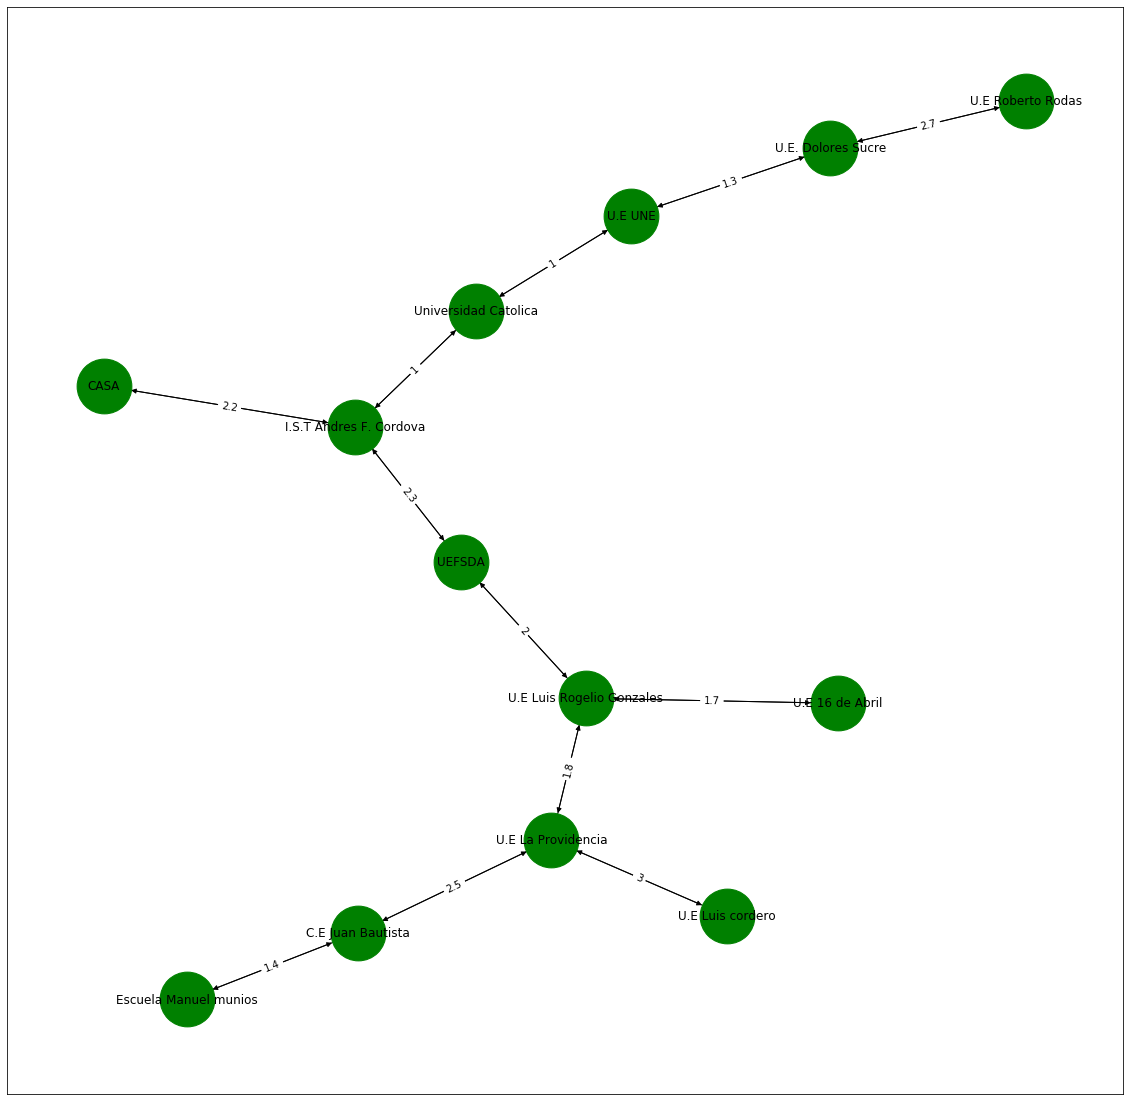

In [2]:
graficarNodo(educativos)

# GRAFICA DEL NODO RESULTANTE

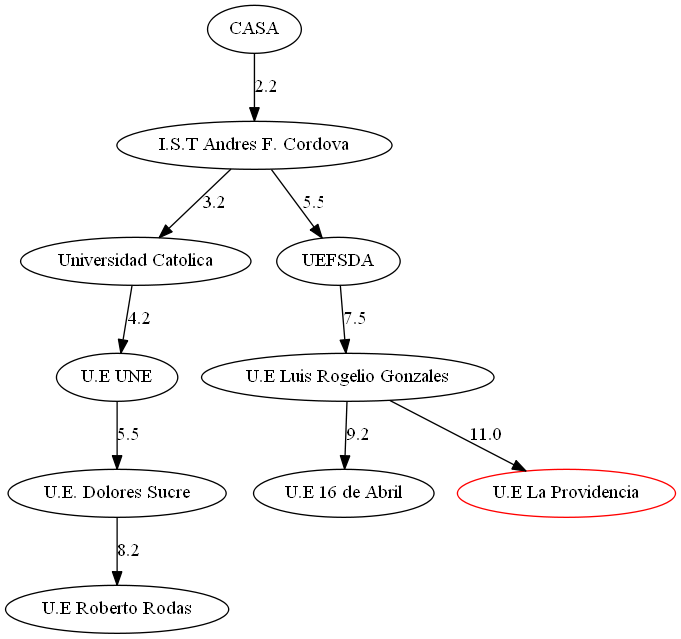

In [3]:

graficarNodoResultado(Grafo)